In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv('input/fifa-world-cup-2022/international_matches.csv', parse_dates = ['date'])

In [8]:
pd.set_option('display.max_columns', None)

In [9]:
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,away_team_score,tournament,city,country,neutral_location,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,1,FIFA World Cup qualification,La Paz,Bolivia,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,1,Friendly,Maceió,Brazil,False,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,0,FIFA World Cup qualification,Quito,Ecuador,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,0,Friendly,Conakry,Guinea,False,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,3,FIFA World Cup qualification,Asunción,Paraguay,False,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,1,UEFA Nations League,Chișinău,Moldova,False,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,2,UEFA Nations League,Vaduz,Liechtenstein,False,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,0,Kirin Cup,Suita,Japan,True,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,3,Kirin Cup,Suita,Japan,False,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23921 entries, 0 to 23920
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   date                           23921 non-null  datetime64[ns]
 1   home_team                      23921 non-null  object        
 2   away_team                      23921 non-null  object        
 3   home_team_continent            23921 non-null  object        
 4   away_team_continent            23921 non-null  object        
 5   home_team_fifa_rank            23921 non-null  int64         
 6   away_team_fifa_rank            23921 non-null  int64         
 7   home_team_total_fifa_points    23921 non-null  int64         
 8   away_team_total_fifa_points    23921 non-null  int64         
 9   home_team_score                23921 non-null  int64         
 10  away_team_score                23921 non-null  int64         
 11  tournament     

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
home_team_fifa_rank,23921.0,77.854688,52.355225,1.0,33.0,71.0,115.0,211.0
away_team_fifa_rank,23921.0,80.797375,53.232902,1.0,36.0,73.0,119.0,211.0
home_team_total_fifa_points,23921.0,323.401488,500.825725,0.0,0.0,0.0,547.0,2164.0
away_team_total_fifa_points,23921.0,315.453576,490.944273,0.0,0.0,0.0,523.0,2164.0
home_team_score,23921.0,1.609214,1.630127,0.0,0.0,1.0,2.0,31.0
away_team_score,23921.0,1.068266,1.263944,0.0,0.0,1.0,2.0,21.0
home_team_goalkeeper_score,8379.0,74.963838,8.212242,47.0,70.0,75.0,81.0,97.0
away_team_goalkeeper_score,8095.0,74.212477,8.225919,47.0,69.0,74.0,80.0,97.0
home_team_mean_defense_score,7787.0,74.903249,6.003114,52.8,71.0,75.2,78.8,91.8
home_team_mean_offense_score,8510.0,75.818743,6.268416,53.3,71.7,75.7,80.0,93.0


In [12]:
# Listing numerical and categorical columns
num_cols = list(df.select_dtypes(include=['int64','float64']).columns)

cat_cols = list(df.select_dtypes(include=['object']).columns)

print(f'Numerical columns: \n\n{num_cols}\n\nCategorical columns: \n\n{cat_cols}')

Numerical columns: 

['home_team_fifa_rank', 'away_team_fifa_rank', 'home_team_total_fifa_points', 'away_team_total_fifa_points', 'home_team_score', 'away_team_score', 'home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']

Categorical columns: 

['home_team', 'away_team', 'home_team_continent', 'away_team_continent', 'tournament', 'city', 'country', 'shoot_out', 'home_team_result']


In [13]:
# Listing all columns which contains 'NaN' values
columns_contains_null = [col for col in df.columns if df[col].isnull().any()]
print(f'Columns contain \'null\' values: \n\n{columns_contains_null}')

Columns contain 'null' values: 

['home_team_goalkeeper_score', 'away_team_goalkeeper_score', 'home_team_mean_defense_score', 'home_team_mean_offense_score', 'home_team_mean_midfield_score', 'away_team_mean_defense_score', 'away_team_mean_offense_score', 'away_team_mean_midfield_score']


In [14]:
fifa2022_teams = ['Qatar', 'Ecuador', 'Senegal', 'Netherlands',
                  'England', 'IR Iran', 'USA', 'Wales',
                  'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                  'France', 'Australia', 'Denmark', 'Tunisia',
                  'Spain', 'Costa Rica', 'Germany', 'Japan',
                  'Belgium', 'Canada', 'Morocco', 'Croatia',
                  'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                  'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

## Let's try to answer the following questions:
- What team has the strongest defense, midfield, and offense players?
- Is there really such a thing as a home team advantage?
- Do teams with stronger offense players score more goals? And do teams with stronger goalkeepers receive fewer goals?
- What team has the longest winning streak?
- Does the best team always win? Can you explain why a weaker team sometimes win?



In [15]:
for x in fifa2022_teams:
    for y in columns_contains_null:
         df[y].fillna(df[df[y[0:9]]==x][y].mean(), inplace=True)

In [16]:
ranks = []
for x in fifa2022_teams:
    rank_df = df[(df['home_team']== x) | (df['away_team']== x)].sort_values(['date','home_team_fifa_rank','away_team_fifa_rank'], ascending=[False,True,True]).iloc[0]
    if rank_df['home_team']==x:
        rank = rank_df['home_team_fifa_rank']
    else:
        rank = rank_df['away_team_fifa_rank']
    ranks.append(rank)

team_ranks = pd.DataFrame({'Team':fifa2022_teams, 'Rank': ranks}).sort_values('Rank').reset_index(drop=True)
team_ranks.index += 1
team_ranks

,Team,Rank
1,Brazil,1
2,Belgium,2
3,France,3
4,Argentina,4
5,England,5
6,Spain,7
7,Portugal,8
8,Mexico,9
9,Netherlands,10
10,Denmark,11


In [17]:
print('\nTop 10 team ranking:\n' )
team_ranks[:10]


Top 10 team ranking:



,Team,Rank
1,Brazil,1
2,Belgium,2
3,France,3
4,Argentina,4
5,England,5
6,Spain,7
7,Portugal,8
8,Mexico,9
9,Netherlands,10
10,Denmark,11


## 1. Goalkeeper score

In [18]:
goalkeeper_score = []
for x in fifa2022_teams:
    gk_score = np.round((df[df["home_team"]==x]['home_team_goalkeeper_score'].mean() + df[df["away_team"]==x]['away_team_goalkeeper_score'].mean())/2, 2)
    goalkeeper_score.append(gk_score)

goalkeeper_scores = pd.DataFrame({'Team':fifa2022_teams, 'Gk score': goalkeeper_score}).sort_values('Gk score', ascending=False).reset_index(drop=True)
goalkeeper_scores.index += 1
goalkeeper_scores

,Team,Gk score
1,Spain,83.06
2,Germany,82.27
3,France,81.20
4,Brazil,79.82
5,England,79.11
6,Netherlands,79.03
7,Belgium,78.55
8,Portugal,78.42
9,Poland,78.18
10,USA,77.35


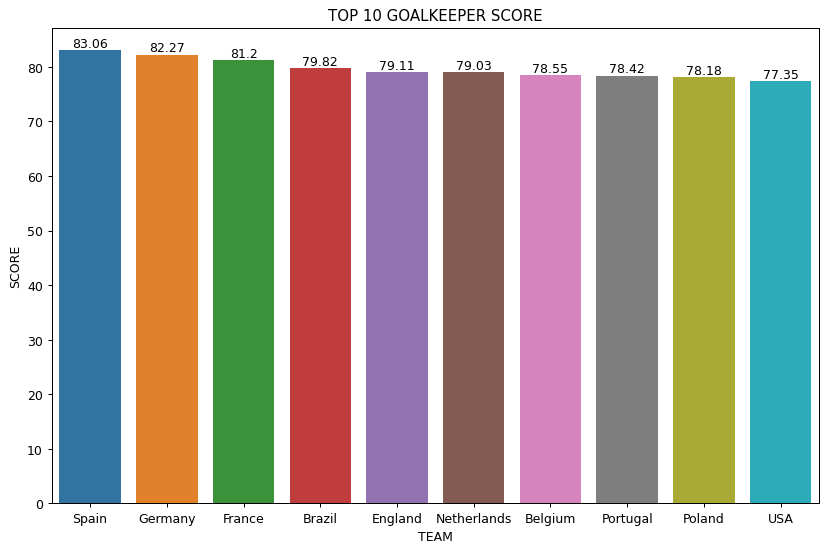

In [19]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=goalkeeper_scores[:10], x='Team', y='Gk score')
ax.bar_label(ax.containers[0])
plt.xlabel('TEAM')
plt.ylabel('SCORE')
plt.title('TOP 10 GOALKEEPER SCORE');

## 2. Defence score 

In [20]:
defence_score = []
for x in fifa2022_teams:
    df_score = np.round((df[df["home_team"]==x]['home_team_mean_defense_score'].mean() + df[df["away_team"]==x]['away_team_mean_defense_score'].mean())/2, 2)
    defence_score.append(df_score)

defence_scores = pd.DataFrame({'Team':fifa2022_teams, 'Df score': defence_score}).sort_values('Df score', ascending=False).reset_index(drop=True)
defence_scores.index += 1
defence_scores

,Team,Df score
1,Spain,80.64
2,Serbia,80.23
3,England,79.80
4,Germany,79.32
5,Brazil,79.31
6,France,79.19
7,Portugal,78.92
8,Argentina,78.48
9,Belgium,77.54
10,Netherlands,77.17


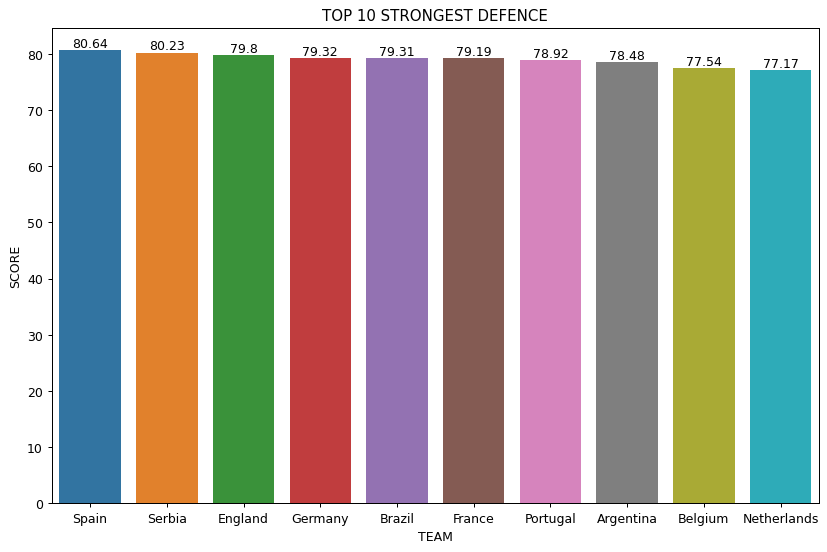

In [21]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=defence_scores[:10], x='Team', y='Df score')
ax.bar_label(ax.containers[0])
plt.xlabel('TEAM')
plt.ylabel('SCORE')
plt.title('TOP 10 STRONGEST DEFENCE');

## 3. Offence score

In [22]:
offence_score = []
for x in fifa2022_teams:
    of_score = np.round((df[df["home_team"]==x]['home_team_mean_offense_score'].mean() + df[df["away_team"]==x]['away_team_mean_offense_score'].mean())/2, 2)
    offence_score.append(of_score)

offence_scores = pd.DataFrame({'Team':fifa2022_teams, 'Of score': offence_score}).sort_values('Of score', ascending=False).reset_index(drop=True)
offence_scores.index += 1
offence_scores

,Team,Of score
1,Argentina,83.51
2,Spain,82.41
3,France,81.91
4,Netherlands,81.88
5,Portugal,81.81
6,England,81.69
7,Brazil,81.68
8,Uruguay,80.55
9,Germany,80.43
10,Belgium,79.48


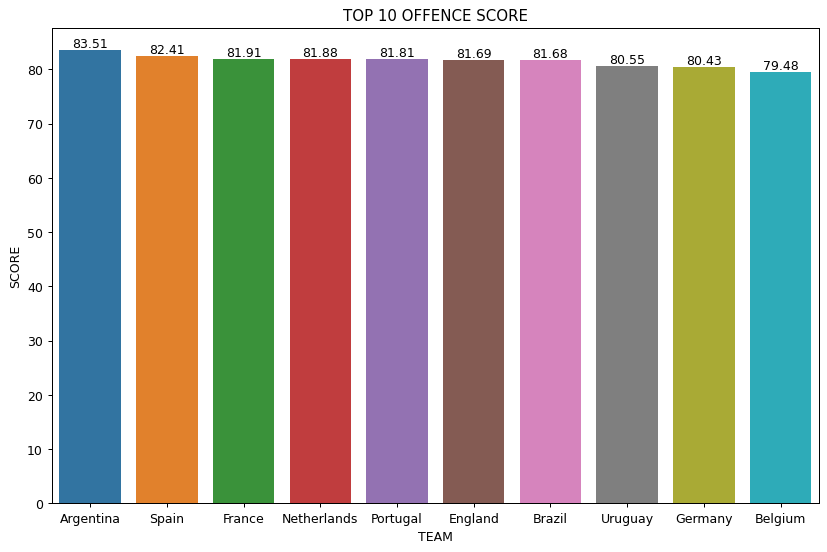

In [23]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=offence_scores[:10], x='Team', y='Of score')
ax.bar_label(ax.containers[0])
plt.xlabel('TEAM')
plt.ylabel('SCORE')
plt.title('TOP 10 OFFENCE SCORE');

## 4. Midfield score

In [24]:
midfield_score = []
for x in fifa2022_teams:
    md_score = np.round((df[df["home_team"]==x]['home_team_mean_midfield_score'].mean() + df[df["away_team"]==x]['away_team_mean_midfield_score'].mean())/2, 2)
    midfield_score.append(md_score)

midfield_scores = pd.DataFrame({'Team':fifa2022_teams, 'Md score': midfield_score}).sort_values('Md score', ascending=False).reset_index(drop=True)
midfield_scores.index += 1
midfield_scores

,Team,Md score
1,Spain,83.11
2,France,82.04
3,Germany,81.62
4,England,81.16
5,Argentina,80.94
6,Brazil,80.82
7,Portugal,80.77
8,Netherlands,80.58
9,Serbia,80.31
10,Belgium,79.20


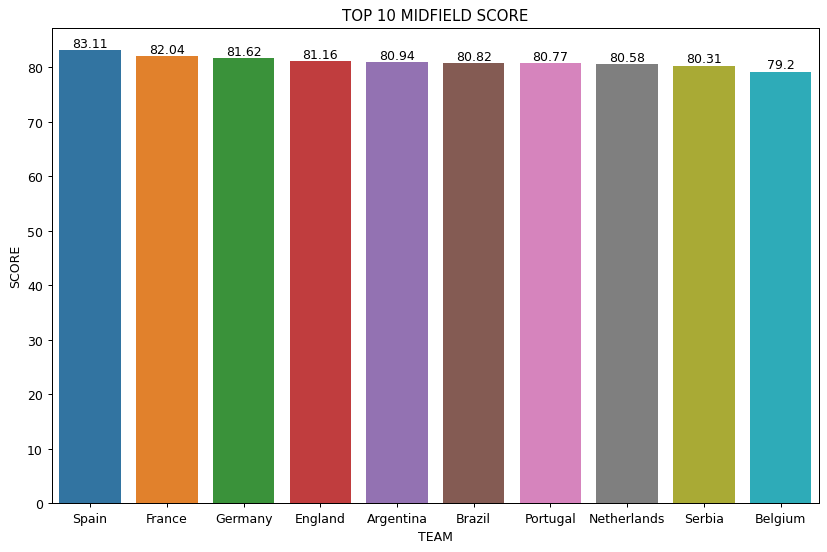

In [25]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=midfield_scores[:10], x='Team', y='Md score')
ax.bar_label(ax.containers[0])
plt.xlabel('TEAM')
plt.ylabel('SCORE')
plt.title('TOP 10 MIDFIELD SCORE');

## 5. Win percentage

In [26]:
hwins, hdraws, hloses = [], [], []
awins, adraws, aloses = [], [], []
for team in fifa2022_teams:
    home_win = df[df['home_team']==team][df['home_team_result']=='Win'].shape[0]
    home_draw = df[df['home_team']==team][df['home_team_result']=='Draw'].shape[0]
    home_lose = df[df['home_team']==team][df['home_team_result']=='Lose'].shape[0]
    
    away_win = df[df['away_team']==team][df['home_team_result']=='Lose'].shape[0]
    away_draw = df[df['away_team']==team][df['home_team_result']=='Draw'].shape[0]
    away_lose = df[df['away_team']==team][df['home_team_result']=='Win'].shape[0]  
    
    hwins.append(home_win)
    hdraws.append(home_draw)
    hloses.append(home_lose)
    
    awins.append(away_win)
    adraws.append(away_draw)
    aloses.append(away_lose)
    
    wins = np.add(hwins,awins)
    draws = np.add(hdraws,adraws)
    loses = np.add(hloses,aloses)

    
win_draw_lose = pd.DataFrame({'Team':fifa2022_teams, 'Win': wins, 'Draw': draws, 'Lose': loses,
                              'Home win': hwins, 'Home draw': hdraws, 'Home lose': hloses,
                              'Away win': awins, 'Away draw': adraws, 'Away lose': aloses})

win_draw_lose.insert(1, 'Total', win_draw_lose['Win']+win_draw_lose['Draw']+win_draw_lose['Lose'])
win_draw_lose.insert(8, 'Total Home', win_draw_lose['Home win']+win_draw_lose['Home draw']+win_draw_lose['Home lose'])
win_draw_lose.insert(12, 'Total Away', win_draw_lose['Away win']+win_draw_lose['Away draw']+win_draw_lose['Away lose'])

win_draw_lose['Win %'] = np.around(100*win_draw_lose['Win']/win_draw_lose['Total'], 2)
win_draw_lose['Draw %'] = np.round(100*win_draw_lose['Draw']/win_draw_lose['Total'], 2)
win_draw_lose['Lose %'] = np.round(100*win_draw_lose['Lose']/win_draw_lose['Total'], 2)

win_draw_lose['Home Win %'] = np.round(100*win_draw_lose['Home win']/win_draw_lose['Total Home'], 2)
win_draw_lose['Home Draw %'] = np.round(100*win_draw_lose['Home draw']/win_draw_lose['Total Home'], 2)
win_draw_lose['Home Lose %'] = np.round(100*win_draw_lose['Home lose']/win_draw_lose['Total Home'], 2)

win_draw_lose['Away Win %'] = np.round(100*win_draw_lose['Away win']/win_draw_lose['Total Away'], 2)
win_draw_lose['Away Draw %'] = np.round(100*win_draw_lose['Away draw']/win_draw_lose['Total Away'], 2)
win_draw_lose['Away Lose %'] = np.round(100*win_draw_lose['Away lose']/win_draw_lose['Total Away'], 2)
win_draw_lose = win_draw_lose.sort_values('Win %', ascending=False).reset_index(drop=True)
win_draw_lose.index += 1
win_draw_lose.style.set_properties(**{'background-color': 'gray', 'color':'yellow'}, subset=['Home win','Home Win %','Win %'])

,Team,Total,Win,Draw,Lose,Home win,Home draw,Home lose,Total Home,Away win,Away draw,Away lose,Total Away,Win %,Draw %,Lose %,Home Win %,Home Draw %,Home Lose %,Away Win %,Away Draw %,Away Lose %
1,Brazil,433,301,76,56,181,31,21,233,120,45,35,200,69.520000,17.550000,12.930000,77.680000,13.300000,9.010000,60.000000,22.500000,17.500000
2,Spain,354,246,64,44,145,27,17,189,101,37,27,165,69.490000,18.080000,12.430000,76.720000,14.290000,8.990000,61.210000,22.420000,16.360000
3,France,370,230,83,57,145,44,32,221,85,39,25,149,62.160000,22.430000,15.410000,65.610000,19.910000,14.480000,57.050000,26.170000,16.780000
4,Germany,390,240,82,68,139,44,36,219,101,38,32,171,61.540000,21.030000,17.440000,63.470000,20.090000,16.440000,59.060000,22.220000,18.710000
5,IR Iran,366,217,79,70,133,31,27,191,84,48,43,175,59.290000,21.580000,19.130000,69.630000,16.230000,14.140000,48.000000,27.430000,24.570000
6,Netherlands,340,201,74,65,119,40,33,192,82,34,32,148,59.120000,21.760000,19.120000,61.980000,20.830000,17.190000,55.410000,22.970000,21.620000
7,Portugal,336,198,79,59,123,37,24,184,75,42,35,152,58.930000,23.510000,17.560000,66.850000,20.110000,13.040000,49.340000,27.630000,23.030000
8,Argentina,367,216,79,72,130,36,24,190,86,43,48,177,58.860000,21.530000,19.620000,68.420000,18.950000,12.630000,48.590000,24.290000,27.120000
9,England,334,196,75,63,124,38,32,194,72,37,31,140,58.680000,22.460000,18.860000,63.920000,19.590000,16.490000,51.430000,26.430000,22.140000
10,Croatia,320,172,79,69,92,38,24,154,80,41,45,166,53.750000,24.690000,21.560000,59.740000,24.680000,15.580000,48.190000,24.700000,27.110000


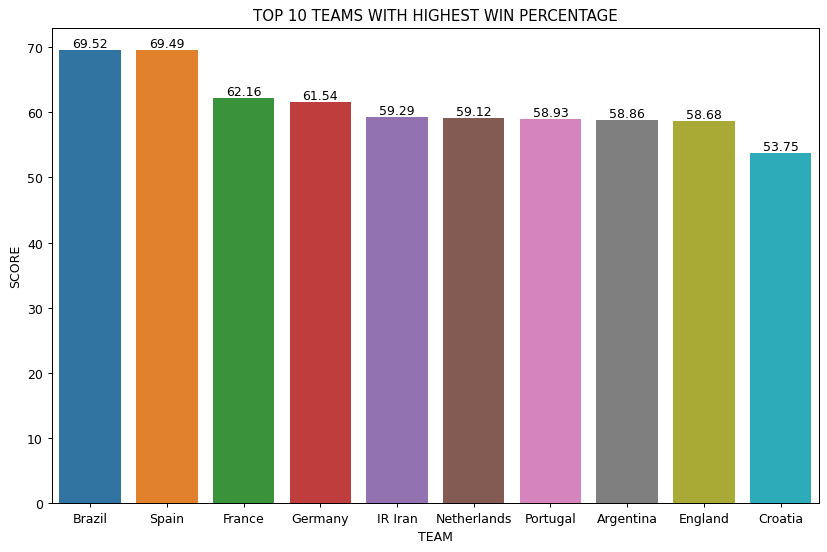

In [27]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=win_draw_lose[:10], x='Team', y='Win %')
ax.bar_label(ax.containers[0])
plt.xlabel('TEAM')
plt.ylabel('SCORE')
plt.title('TOP 10 TEAMS WITH HIGHEST WIN PERCENTAGE');

## 6. Goals

In [28]:
goals_conceded_home, goals_scored_home, goals_conceded_away, goals_scored_away = [], [], [], []
total_goals_scored, total_goals_conceded = [], []    
for team in fifa2022_teams:
    gch = df[df['home_team']== team]['away_team_score'].sum()
    gsh = df[df['home_team']== team]['home_team_score'].sum()
    gca = df[df['away_team']== team]['home_team_score'].sum()
    gsa = df[df['away_team']== team]['away_team_score'].sum()


    tgc = np.add(gch,gca)
    tgs = np.add(gsh,gsa)

    goals_conceded_home.append(gch)
    goals_scored_home.append(gsh)
    goals_conceded_away.append(gca)
    goals_scored_away.append(gsa)
    
    total_goals_scored.append(tgs)
    total_goals_conceded.append(tgc)

goals = pd.DataFrame({'Team':fifa2022_teams, 'Scored goals home': goals_scored_home, 'Scored goals away': goals_scored_away, 'Total scored goals': total_goals_scored,
                      'Conceded goals home': goals_conceded_home, 'Conceded goals away': goals_conceded_away, 'Total conceded goals': total_goals_conceded})

goals['Goal difference'] = goals['Total scored goals'] - goals['Total conceded goals']
goals['Goal ratio'] = goals['Total scored goals'] / goals['Total conceded goals']

goals = goals.sort_values('Goal difference', ascending=False).reset_index(drop=True)
goals.index += 1
goals

,Team,Scored goals home,Scored goals away,Total scored goals,Conceded goals home,Conceded goals away,Total conceded goals,Goal difference,Goal ratio
1,Brazil,558,396,954,141,159,300,654,3.180000
2,Spain,469,312,781,107,141,248,533,3.149194
3,Germany,544,331,875,220,171,391,484,2.237852
4,IR Iran,425,288,713,115,165,280,433,2.546429
5,Netherlands,426,274,700,145,142,287,413,2.439024
6,France,447,223,670,154,112,266,404,2.518797
7,Portugal,424,244,668,124,144,268,400,2.492537
8,England,384,246,630,132,119,251,379,2.509960
9,Japan,533,243,776,273,153,426,350,1.821596
10,Mexico,572,286,858,272,247,519,339,1.653179


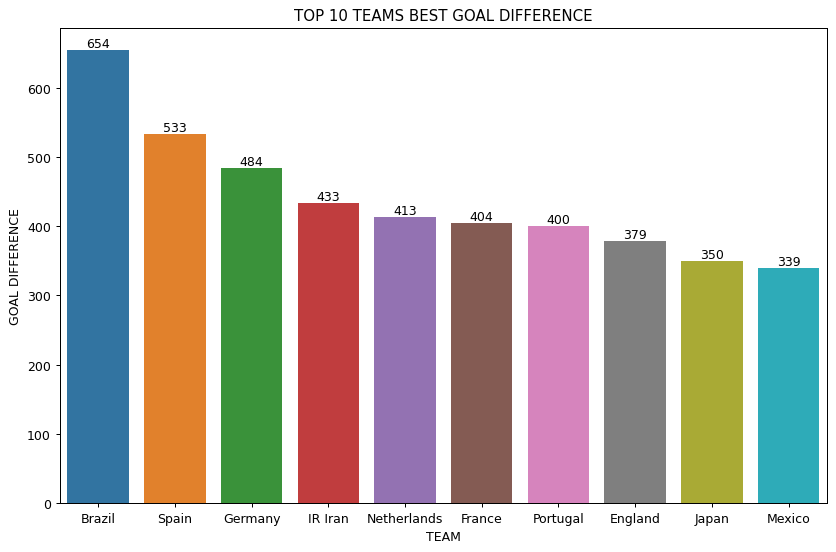

In [29]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=goals[:10], x='Team', y='Goal difference')
ax.bar_label(ax.containers[0])
plt.xlabel('TEAM')
plt.ylabel('GOAL DIFFERENCE')
plt.title('TOP 10 TEAMS BEST GOAL DIFFERENCE');

## 7. Offence strength vs Goals scored

In [30]:
offence_players_vs_goals_scored = offence_scores.merge(goals,on='Team')[['Team', 'Of score', 'Total scored goals']]
offence_players_vs_goals_scored['Total scored goals/Gk score'] = offence_players_vs_goals_scored['Total scored goals']/offence_players_vs_goals_scored['Of score']
offence_players_vs_goals_scored = offence_players_vs_goals_scored.sort_values('Total scored goals/Gk score', ascending=False).reset_index(drop=True)
offence_players_vs_goals_scored.index += 1
offence_players_vs_goals_scored

,Team,Of score,Total scored goals,Total scored goals/Gk score
1,Brazil,81.68,954,11.679726
2,Mexico,77.68,858,11.045314
3,Germany,80.43,875,10.879025
4,Japan,73.87,776,10.504941
5,Saudi Arabia,74.09,762,10.284789
6,USA,75.77,761,10.043553
7,IR Iran,73.97,713,9.639043
8,Spain,82.41,781,9.477005
9,Korea Republic,75.19,685,9.110254
10,Netherlands,81.88,700,8.549096


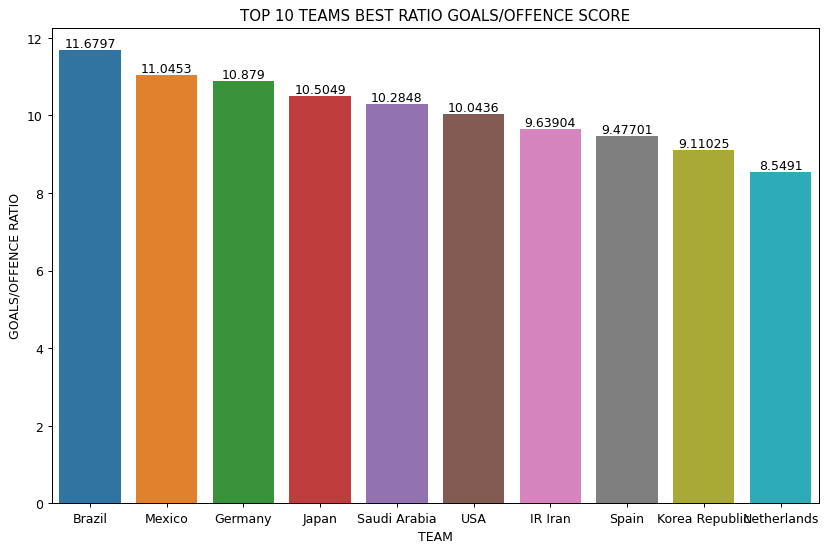

In [31]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=offence_players_vs_goals_scored[:10], x='Team', y='Total scored goals/Gk score')
ax.bar_label(ax.containers[0])
plt.xlabel('TEAM')
plt.ylabel('GOALS/OFFENCE RATIO')
plt.title('TOP 10 TEAMS BEST RATIO GOALS/OFFENCE SCORE');

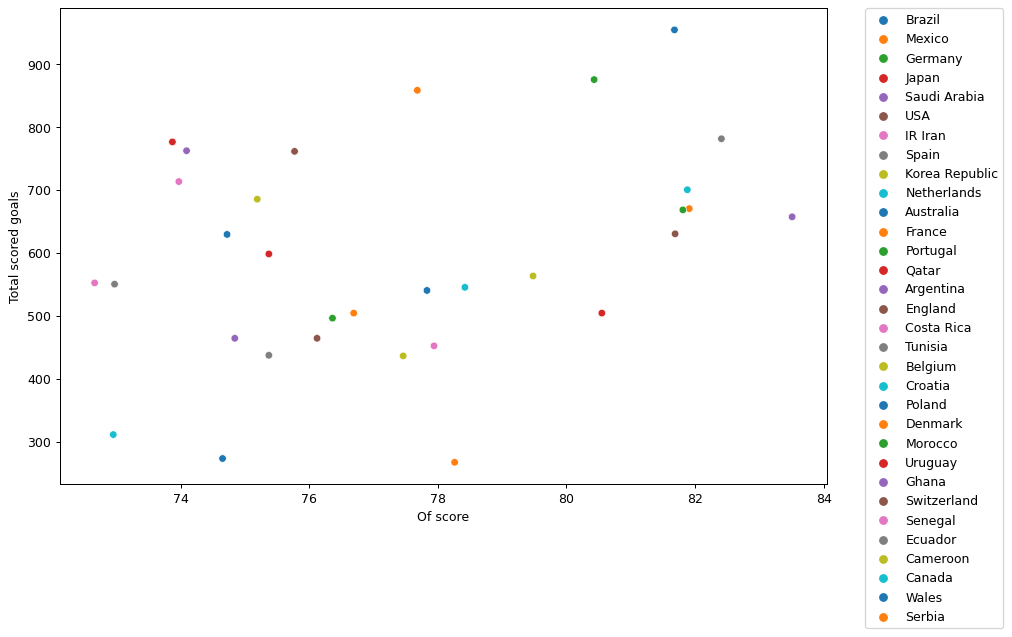

In [32]:
plt.figure(figsize=(11,7), dpi=90)
sns.scatterplot(data=offence_players_vs_goals_scored, x='Of score', y='Total scored goals', hue = 'Team', palette='tab10')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

## 8. Goalkeepers vs Goals conceded

In [33]:
goalkeeper_vs_goals_conceded = goalkeeper_scores.merge(goals,on='Team')[['Team', 'Gk score', 'Total conceded goals']]
goalkeeper_vs_goals_conceded['Conceded goals/Gk score Ratio'] = goalkeeper_vs_goals_conceded['Total conceded goals']/goalkeeper_vs_goals_conceded['Gk score']
goalkeeper_vs_goals_conceded = goalkeeper_vs_goals_conceded.sort_values('Conceded goals/Gk score Ratio').reset_index(drop=True)
goalkeeper_vs_goals_conceded.index += 1
goalkeeper_vs_goals_conceded

,Team,Gk score,Total conceded goals,Conceded goals/Gk score Ratio
1,Serbia,76.48,193,2.523536
2,Spain,83.06,248,2.985793
3,England,79.11,251,3.172797
4,France,81.20,266,3.275862
5,Morocco,71.79,240,3.343084
6,Portugal,78.42,268,3.417496
7,Netherlands,79.03,287,3.631532
8,Brazil,79.82,300,3.758457
9,Australia,76.03,291,3.827437
10,Canada,71.77,276,3.845618


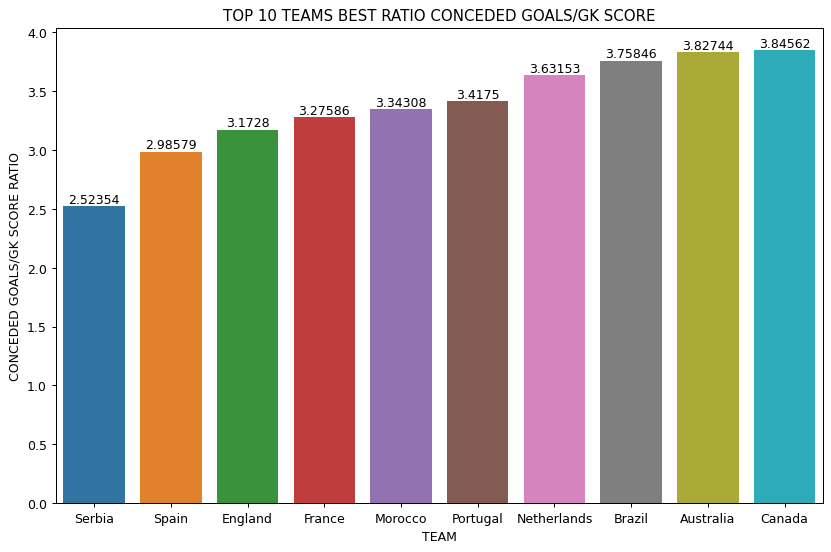

In [34]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=goalkeeper_vs_goals_conceded[:10], x='Team', y='Conceded goals/Gk score Ratio')
ax.bar_label(ax.containers[0])
plt.xlabel('TEAM')
plt.ylabel('CONCEDED GOALS/GK SCORE RATIO')
plt.title('TOP 10 TEAMS BEST RATIO CONCEDED GOALS/GK SCORE');

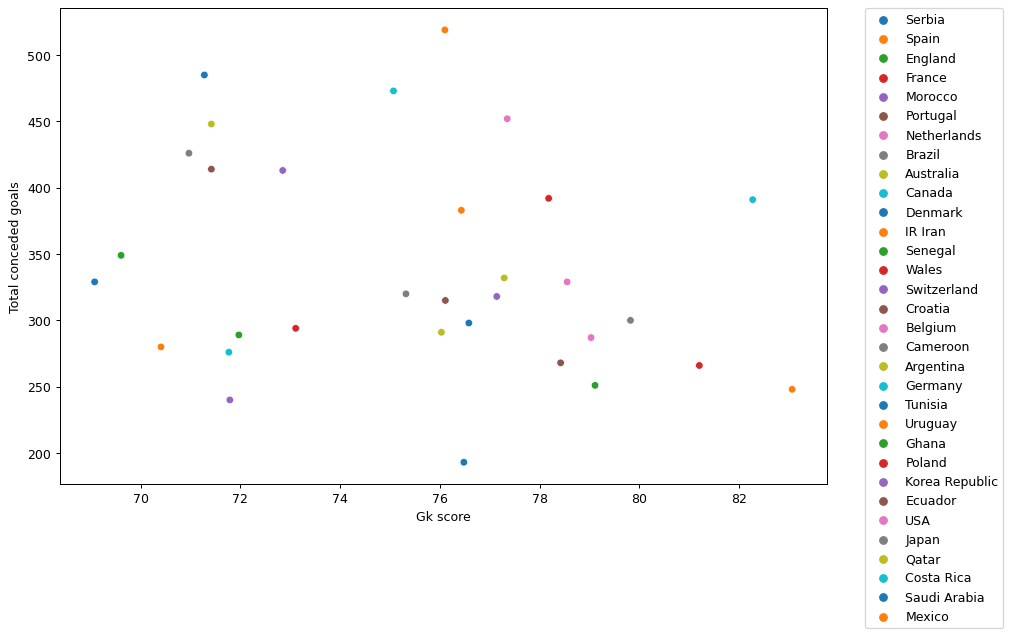

In [35]:
plt.figure(figsize=(11,7), dpi=90)
sns.scatterplot(data=goalkeeper_vs_goals_conceded, x='Gk score', y='Total conceded goals', hue = 'Team', palette='tab10')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0);

## 9. Streaks

In [36]:
dframes = {}
for team in fifa2022_teams:
    df1 = df[(df['home_team']==team) | (df['away_team']==team)]
    df1['winns'] = np.where(((df1['home_team']==team) & (df1['home_team_result']=='Win')) | ((df1['away_team']==team) & (df1['home_team_result']=='Lose')), 1, 0)

    name = team + '_streak'
    dframes[name] = df1

streaks = []
for frame in dframes.keys():
    dframes[frame]['start_of_streak'] = dframes[frame]['winns'].ne(dframes[frame]['winns'].shift())
    dframes[frame]['streaks_id'] = dframes[frame]['start_of_streak'].cumsum()
    dframes[frame]['streak_counter'] = dframes[frame].groupby('streaks_id').cumcount() + 1

    streak = dframes[frame][dframes[frame]['winns']==1]['streak_counter'].max()
    streaks.append(streak)
    
Streaks = pd.DataFrame({'Team':fifa2022_teams, 'Streak': streaks}).sort_values('Streak', ascending=False).reset_index(drop=True)
Streaks.index += 1
Streaks

,Team,Streak
1,Spain,25
2,France,14
3,Brazil,14
4,Australia,13
5,Belgium,12
6,Morocco,12
7,Saudi Arabia,11
8,USA,11
9,Mexico,10
10,Switzerland,10


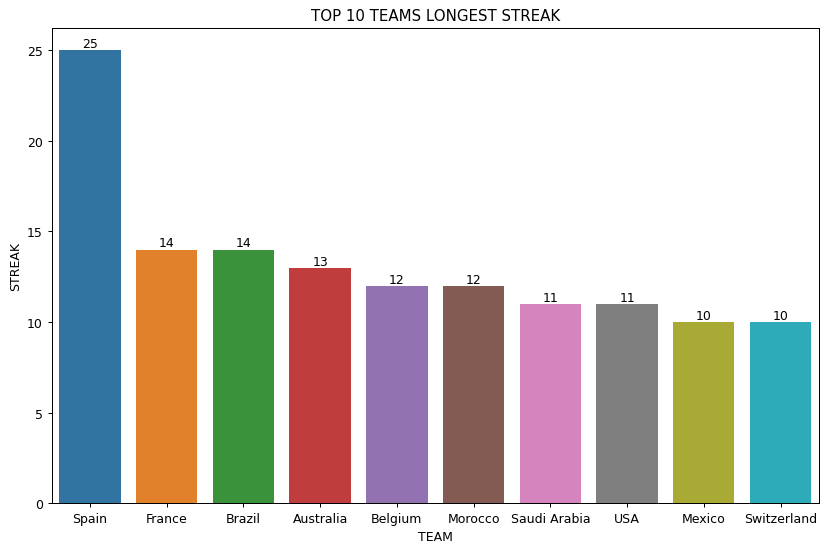

In [37]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=Streaks[:10], x='Team', y='Streak')
ax.bar_label(ax.containers[0])
plt.xlabel('TEAM')
plt.ylabel('STREAK')
plt.title('TOP 10 TEAMS LONGEST STREAK');

## 10. Better team win percentage

In [38]:
away_team_better_rank = df[(df['home_team_fifa_rank'] > df['away_team_fifa_rank'])]['home_team_result'].value_counts()
away_team_better_rank

Lose    4984
Win     3429
Draw    2840
Name: home_team_result, dtype: int64

In [39]:
home_team_better_rank = df[(df['home_team_fifa_rank'] < df['away_team_fifa_rank'])]['home_team_result'].value_counts()
home_team_better_rank

Win     8313
Draw    2542
Lose    1781
Name: home_team_result, dtype: int64

In [40]:
away_team_better_rank_wins_percent = np.round(100 * away_team_better_rank[0] / (away_team_better_rank.sum()), 2)
home_team_better_rank_wins_percent = np.round(100 * home_team_better_rank[0] / (home_team_better_rank.sum()), 2)
total_team_better_rank_wins_percent = np.round(100 * (away_team_better_rank[0] + home_team_better_rank[0]) / (away_team_better_rank.sum() + home_team_better_rank.sum()), 2)

data = {'win percent': [home_team_better_rank_wins_percent, away_team_better_rank_wins_percent, total_team_better_rank_wins_percent]}
better_team_win_percent = pd.DataFrame(data,index=['home','away', 'total'])
better_team_win_percent

,win percent
home,65.79
away,44.29
total,55.66


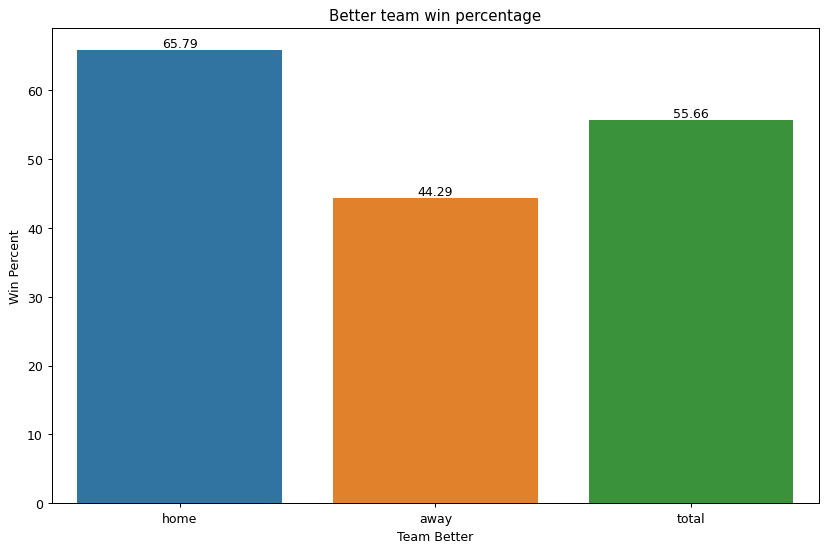

In [41]:
plt.figure(figsize=(11,7), dpi=90)
ax = sns.barplot(data=better_team_win_percent, x=better_team_win_percent.index, y='win percent')
ax.bar_label(ax.containers[0])
plt.xlabel('Team Better')
plt.ylabel('Win Percent')
plt.title('Better team win percentage');